In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/aircrash1908-2008.csv")
df.head()


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,09/17/1908 17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,07/12/1912 06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,08/06/1913 00:00,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,09/09/1913 18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10/17/1913 10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [ ]:
df.describe()


,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


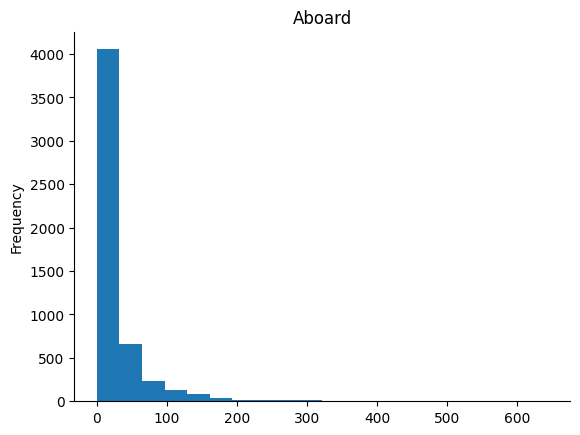

In [ ]:
# @title Aboard

from matplotlib import pyplot as plt
df['Aboard'].plot(kind='hist', bins=20, title='Aboard')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [ ]:
df.shape

(5268, 13)

In [ ]:
len(df)

5268

In [ ]:
df.isnull().sum()

Date               0
Time               0
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [ ]:
df.dtypes

Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

In [ ]:
df["Date"]=pd.to_datetime(df["Date"])
df["Date"].head()

0   1908-09-17
1   1912-07-12
2   1913-08-06
3   1913-09-09
4   1913-10-17
Name: Date, dtype: datetime64[ns]

In [ ]:
df['Year']=pd.DatetimeIndex(df['Date']).year
df['Year'].head()

0    1908
1    1912
2    1913
3    1913
4    1913
Name: Year, dtype: int64

In [ ]:
df.drop(['cn/In','Flight #','Registration','Route'],axis=1,inplace=True)

In [ ]:
df.head()

,Date,Time,Location,Operator,Type,Aboard,Fatalities,Ground,Summary,Year
0,1908-09-17,09/17/1908 17:18,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908
1,1912-07-12,07/12/1912 06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912
2,1913-08-06,08/06/1913 00:00,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913
3,1913-09-09,09/09/1913 18:30,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913
4,1913-10-17,10/17/1913 10:30,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913


In [ ]:
df["Fatalities"].fillna(0,inplace=True)
df["Ground"].fillna(0,inplace=True)
df["Aboard"].fillna(0,inplace=True)

In [ ]:
df.isnull().sum()

Date            0
Time            0
Location       20
Operator       18
Type           27
Aboard          0
Fatalities      0
Ground          0
Summary       390
Year            0
dtype: int64

In [ ]:
df.head()

,Date,Time,Location,Operator,Type,Aboard,Fatalities,Ground,Summary,Year
0,1908-09-17,09/17/1908 17:18,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908
1,1912-07-12,07/12/1912 06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912
2,1913-08-06,08/06/1913 00:00,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913
3,1913-09-09,09/09/1913 18:30,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913
4,1913-10-17,10/17/1913 10:30,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913


In [ ]:
crashes_per_year=df[['Year','Date']].groupby('Year').count()
crashes_per_year=crashes_per_year.reset_index()
crashes_per_year.columns=['Year','Crashes']
crashes_per_year.head()

,Year,Crashes
0,1908,1
1,1912,1
2,1913,3
3,1915,2
4,1916,5


<Axes: xlabel='Year', ylabel='Crashes'>

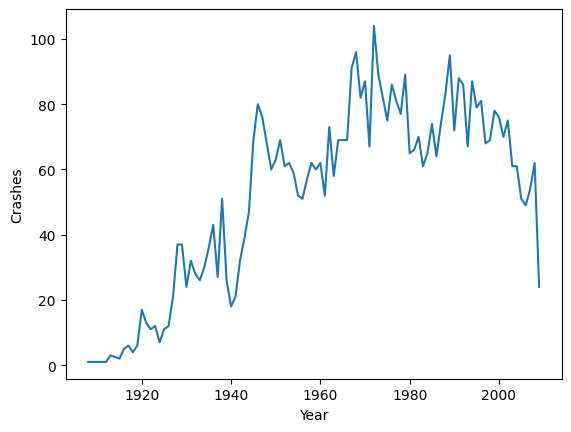

In [ ]:
sns.lineplot(x='Year',y='Crashes',data=crashes_per_year)

In [ ]:
Fatalities_per_year=df[['Year','Fatalities']].groupby('Year').sum()
Fatalities_per_year=Fatalities_per_year.reset_index()
Fatalities_per_year.columns=['Year','Fatalities']
Fatalities_per_year.head()

,Year,Fatalities
0,1908,1.0
1,1912,5.0
2,1913,45.0
3,1915,40.0
4,1916,108.0


<Axes: xlabel='Year', ylabel='Fatalities'>

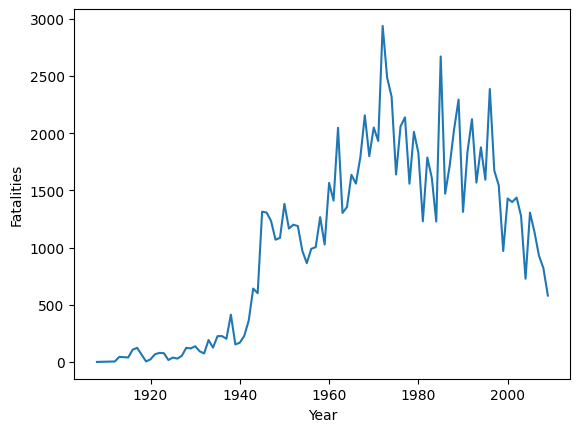

In [ ]:
sns.lineplot(x='Year',y='Fatalities',data=Fatalities_per_year)

In [ ]:
df['Survived']=df['Aboard']-df['Fatalities']
df['Survived'].fillna(0,inplace=True)

In [ ]:
df['Survived']

0        1.0
1        0.0
2        0.0
3        6.0
4        0.0
        ... 
5263    14.0
5264     0.0
5265     0.0
5266     0.0
5267     0.0
Name: Survived, Length: 5268, dtype: float64

In [ ]:
FSG_per_year=df[['Year','Aboard','Fatalities','Ground','Survived']].groupby('Year').sum()


In [ ]:
FSG_per_year=FSG_per_year.reset_index()
FSG_per_year.columns=['Year','Aboard','Fatalities','Ground','Survived']

In [ ]:
FSG_per_year.head()

,Year,Aboard,Fatalities,Ground,Survived
0,1908,2.0,1.0,0.0,1.0
1,1912,5.0,5.0,0.0,0.0
2,1913,51.0,45.0,0.0,6.0
3,1915,60.0,40.0,0.0,20.0
4,1916,109.0,108.0,0.0,1.0


<Axes: xlabel='Year', ylabel='Aboard'>

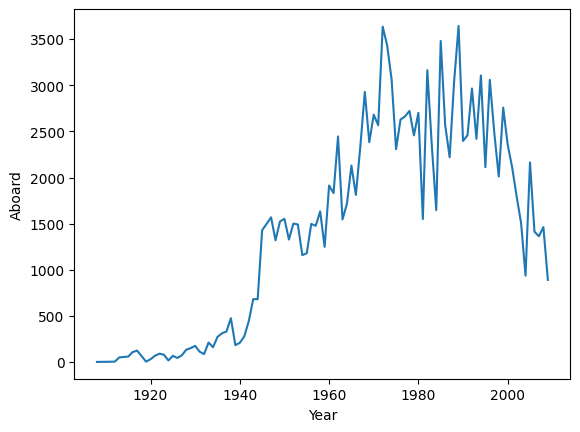

In [ ]:
sns.lineplot(x='Year',y='Aboard',data=FSG_per_year)

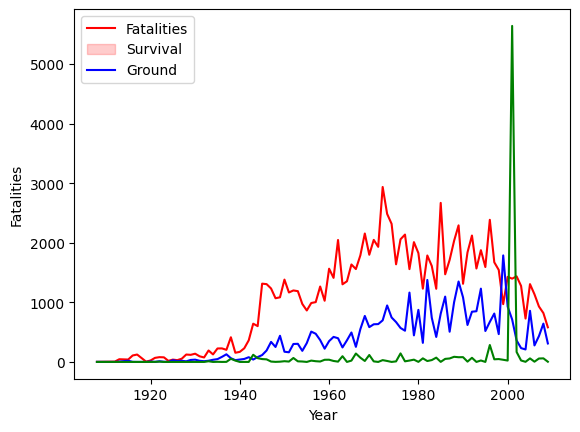

In [ ]:
sns.lineplot(x='Year',y='Fatalities',data=FSG_per_year,color='red')
sns.lineplot(x='Year',y='Survived',data=FSG_per_year,color='blue')
sns.lineplot(x='Year',y='Ground',data=FSG_per_year,color='green')
plt.legend(['Fatalities','Survival','Ground'])

**Insight-**
From the above visualization we can see that the highest number of crashes occured between 1950s and 2000s which also leads to the high rate of fatalities in between these years.

In [ ]:
from collections import Counter

In [ ]:
operator_list=Counter(df['Operator']).most_common(10)
operators=[]
crashes=[]
for operator in operator_list:
    if 'Military' not in operator[0]:
        operators.append(operator[0])
        crashes.append(operator[1])
print('Top 10 worst operators')
pd.DataFrame({'Count of Crashes': crashes},index=operators)

Top 10 worst operators


,Count of Crashes
Aeroflot,179
Air France,70
Deutsche Lufthansa,65
China National Aviation Corporation,44
United Air Lines,44
Air Taxi,44
Pan American World Airways,41


**Most Dagerous Locations**

In [ ]:
location_list=Counter(df['Location'].dropna()).most_common(10)
locations=[]
crashes=[]
for location in location_list:
    locations.append(location[0])
    crashes.append(location[1])
print('Top 10 most dagerous locations')
pd.DataFrame({'Crashes in theis Location':crashes},index=locations)

Top 10 most dagerous locations


,Crashes in theis Location
"Sao Paulo, Brazil",15
"Moscow, Russia",15
"Rio de Janeiro, Brazil",14
"Bogota, Colombia",13
"Manila, Philippines",13
"Anchorage, Alaska",13
"New York, New York",12
"Cairo, Egypt",12
"Chicago, Illinois",11
"Near Moscow, Russia",9
